# Exercise 4: Dimensionality Reduction

Reducción de dimensiones en imágenes utilizando PCA/SVD

In [1]:
using DataFrames, CSV, FileIO, LinearAlgebra, Plots, Images

Se define el path donde se encuentran las imagenes y el nombre de estas

In [2]:
path = pwd()
path = path[1:length(path)-3]
path = "$path" * "fig/"
images_names = ["1", "2", "3", "4", "5"]
println(path)

/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/


Función para comprimir las imagenes

In [3]:
function compress_image(path, names, k)
    outs = String[]
    for name in names
        # Cragar la imágen
        file = path * name * ".jpg"
        img = load(file)
        # Pasarla a escala de grises
        img_gray = Gray.(img)
        # Convertirla a una matriz
        img_matrix = convert(Matrix{Float64}, img_gray)
        # Se aplica SVD y las primeras k componentes
        F = svd(img_matrix)
        M = F.U[:, 1:k] * Diagonal(F.S[1:k]) * F.Vt[1:k, :]
        imagef = colorview(Gray, M)
        out_file = path * name * "_K_$k" * ".jpg"
        # Guardar las imagenes generadas
        println(out_file)
        save(out_file, imagef)
        push!(outs, out_file)
    end
    return outs
end

process_image (generic function with 1 method)

Primero se comienza con una `k=10` y se muestran las imagenes resultantes

/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/1_K_10.jpg
/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/2_K_10.jpg
/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/3_K_10.jpg
/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/4_K_10.jpg
/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/5_K_10.jpg


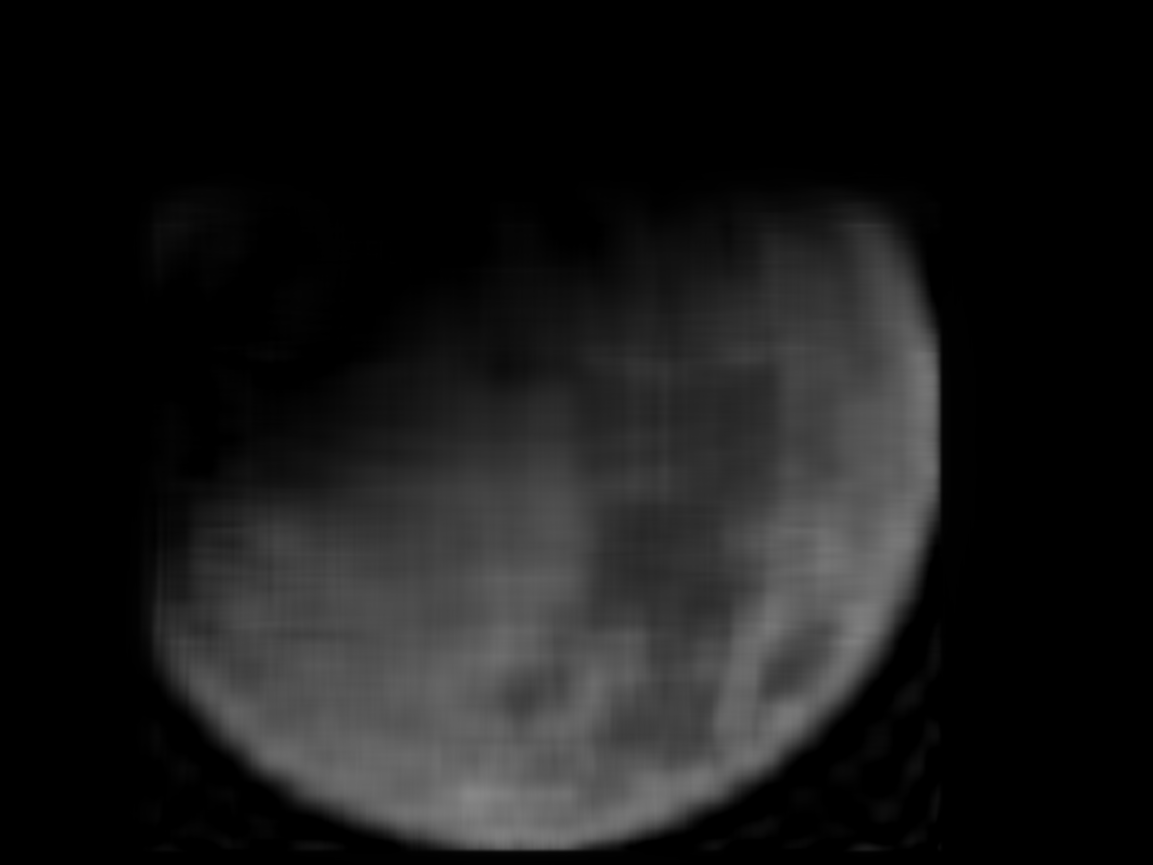

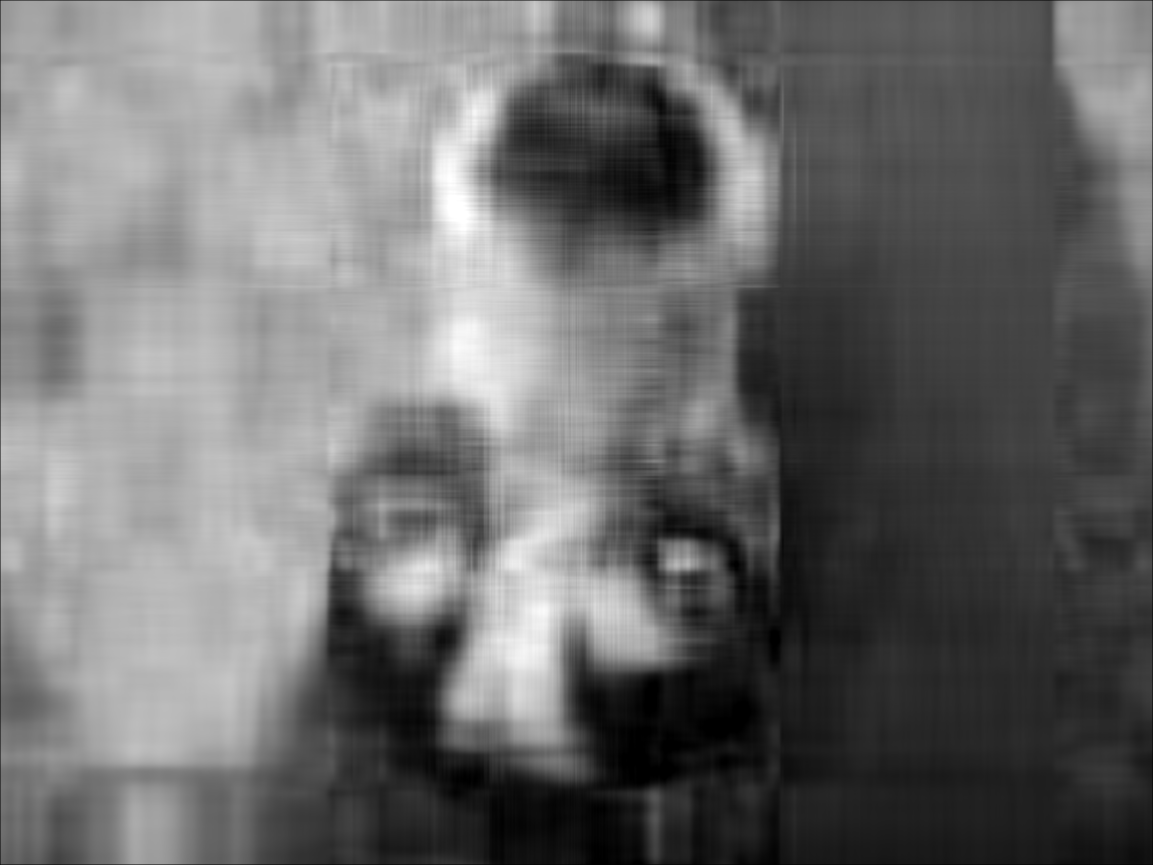

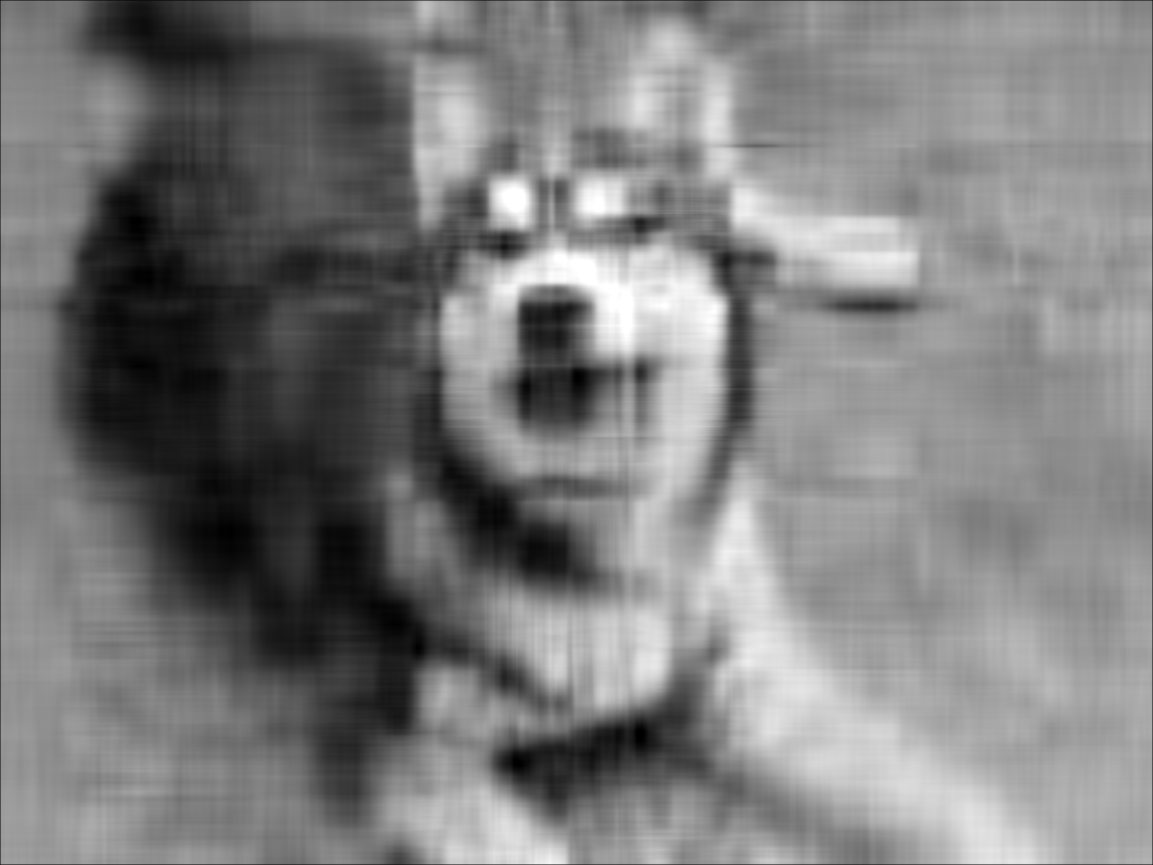

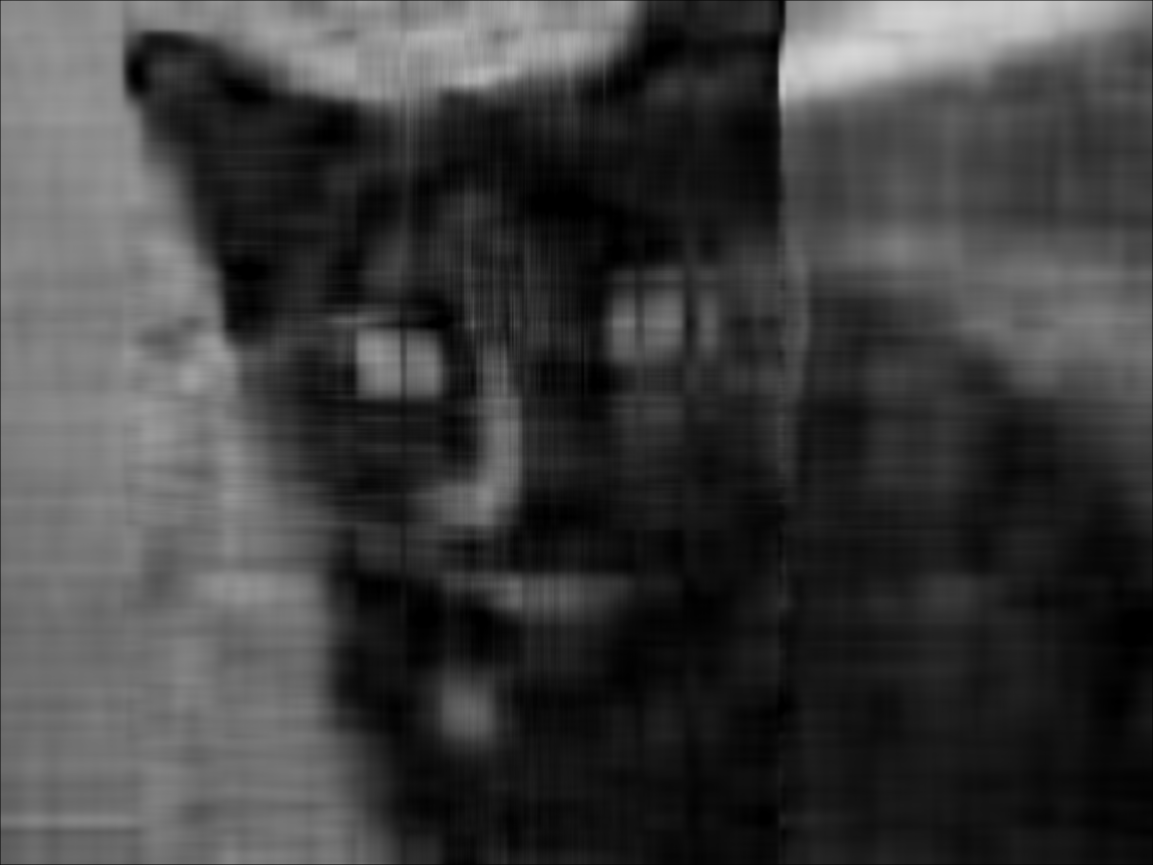

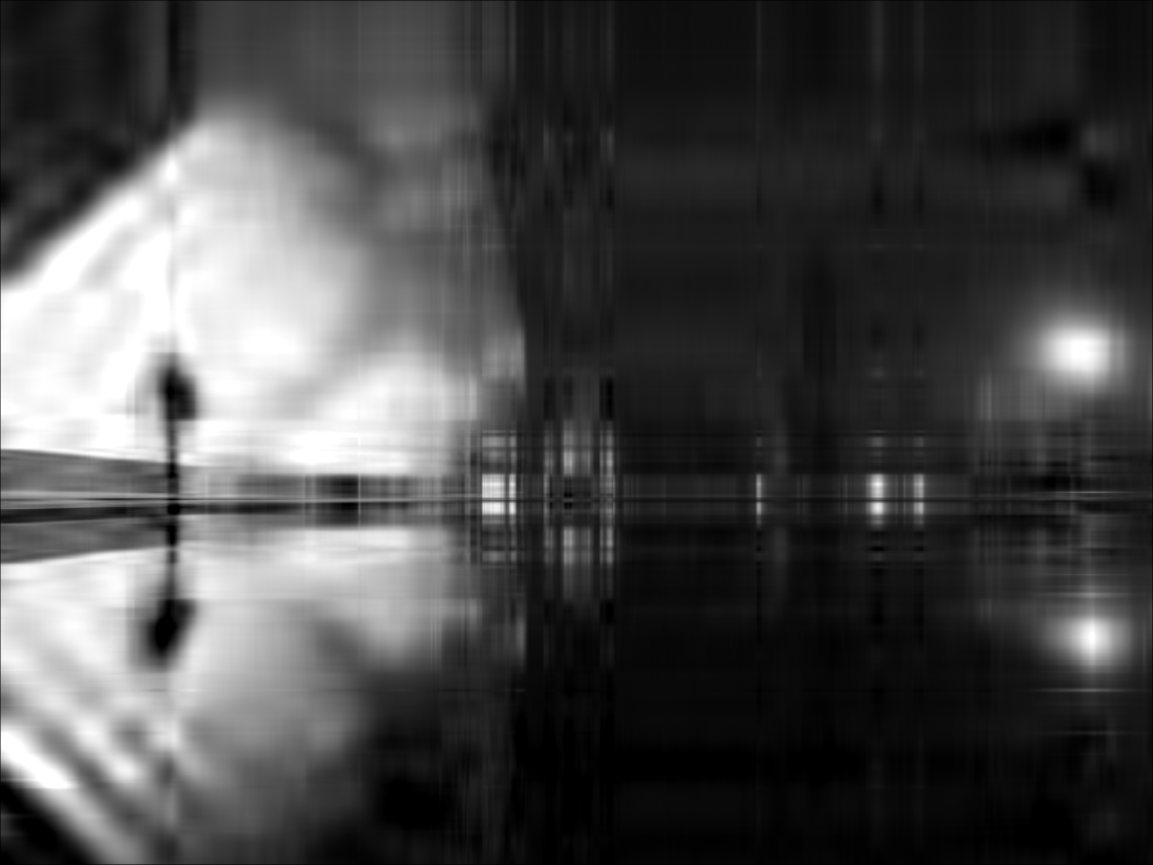

In [4]:
images_generated = compress_image(path, images_names, 10)
for file in images_generated
    img = FileIO.load(file)
    display(img)
end


Ahora para una `k=50` se observa una mayor recuperación de detalles en las imagenes

/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/1_K_50.jpg
/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/2_K_50.jpg
/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/3_K_50.jpg
/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/4_K_50.jpg
/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/julia/src/student_submissions/dimensionality_reduction/jacobo_omar/Exercise4/fig/5_K_50.jpg


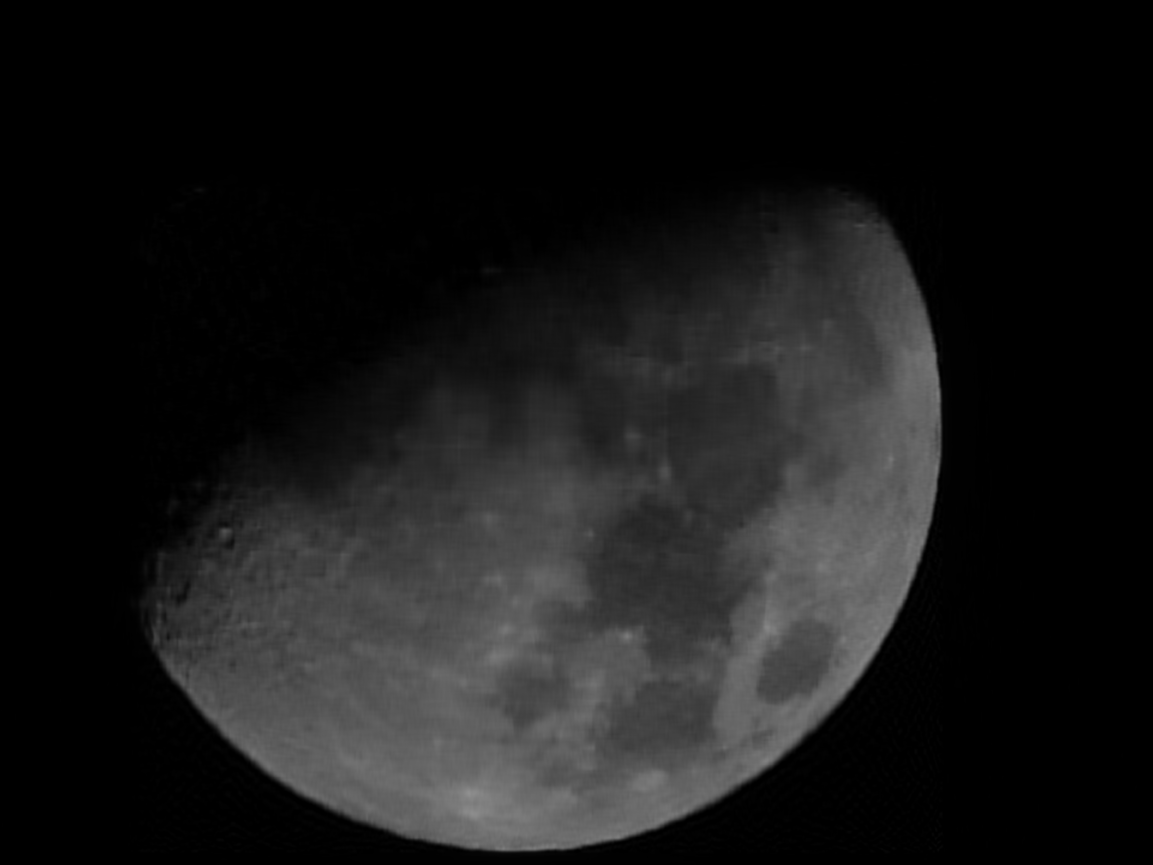

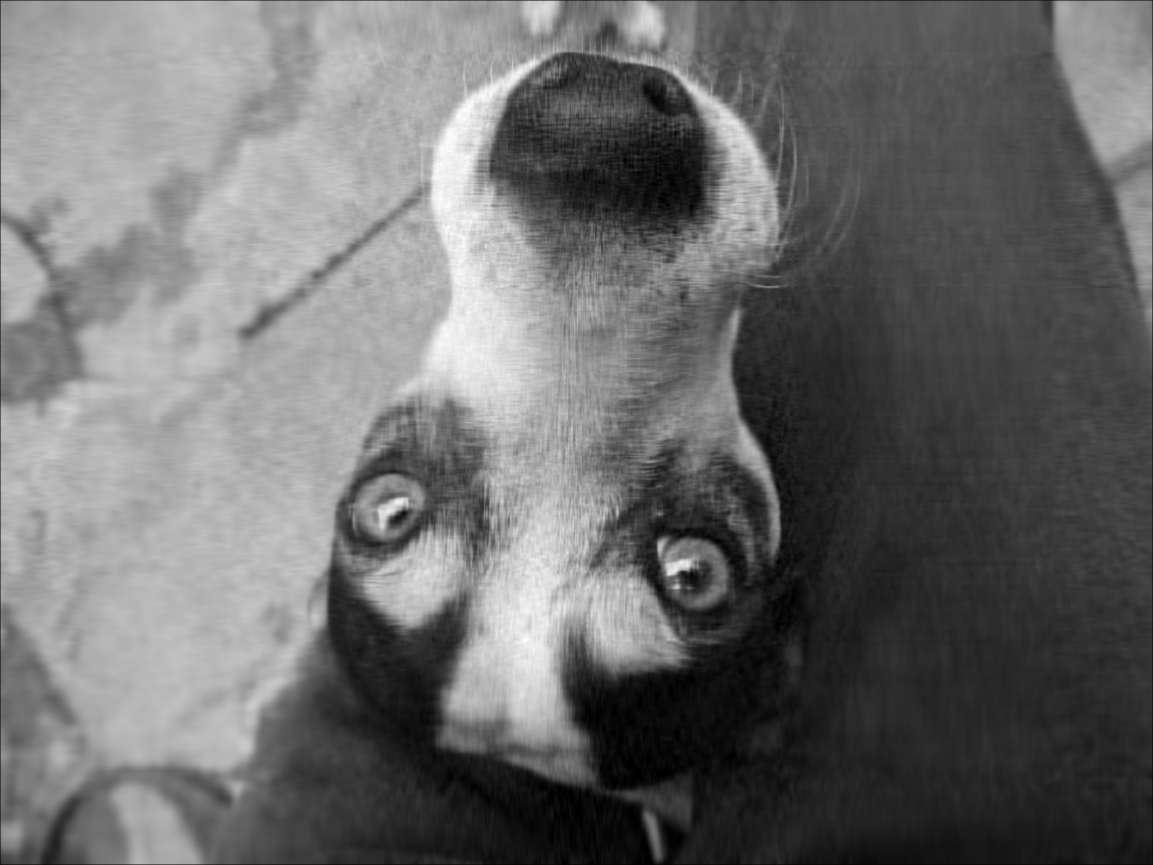

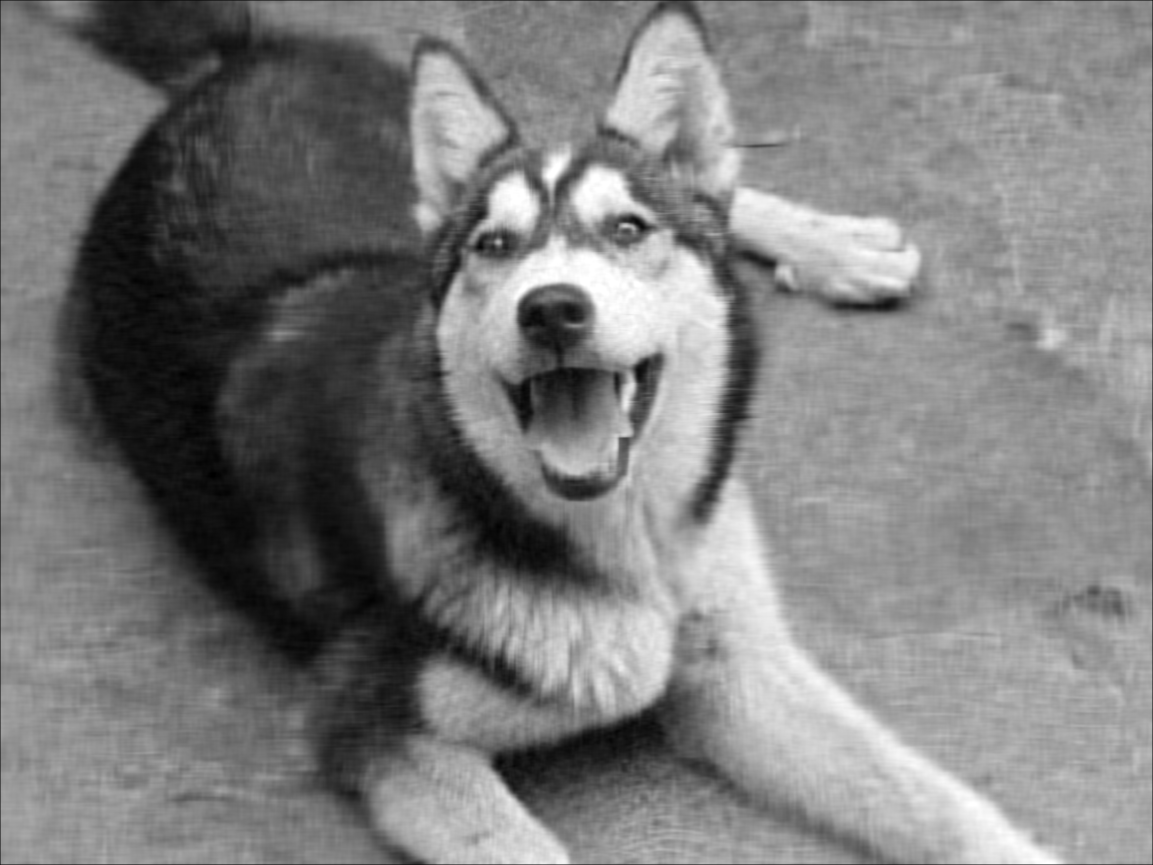

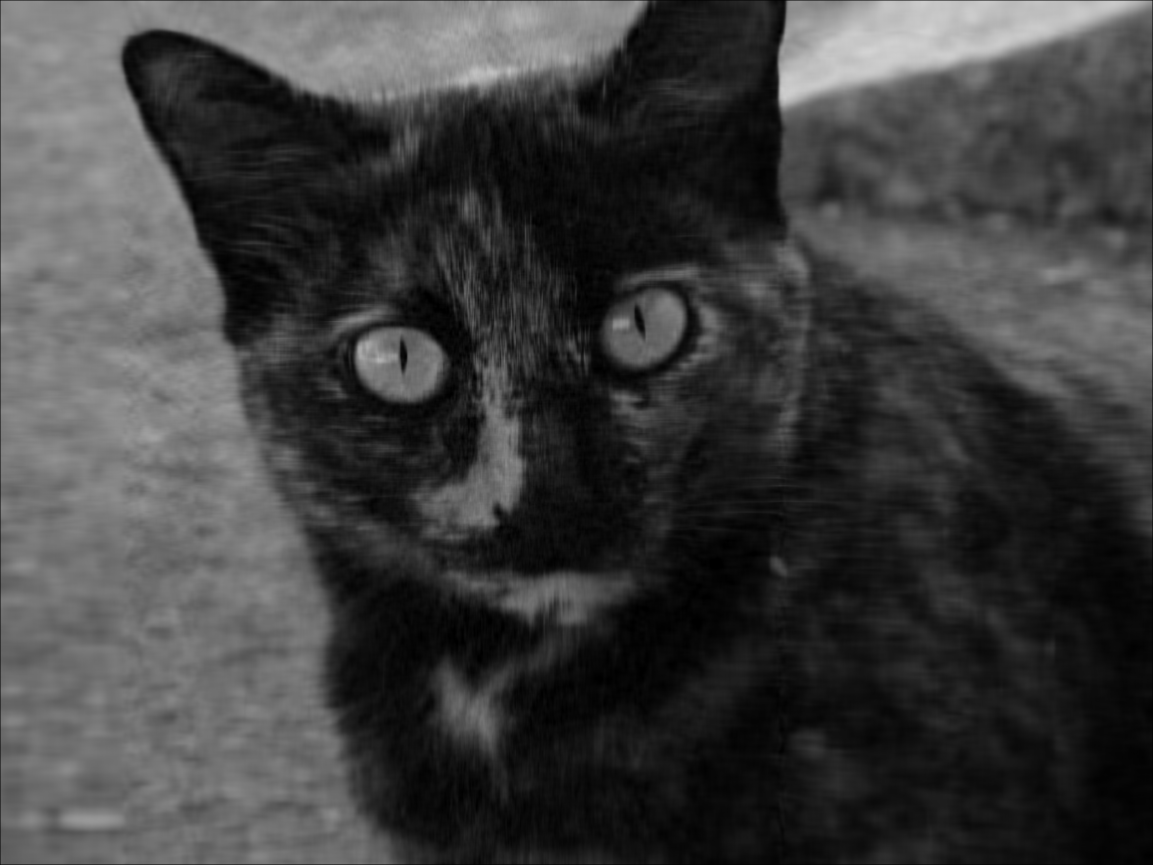

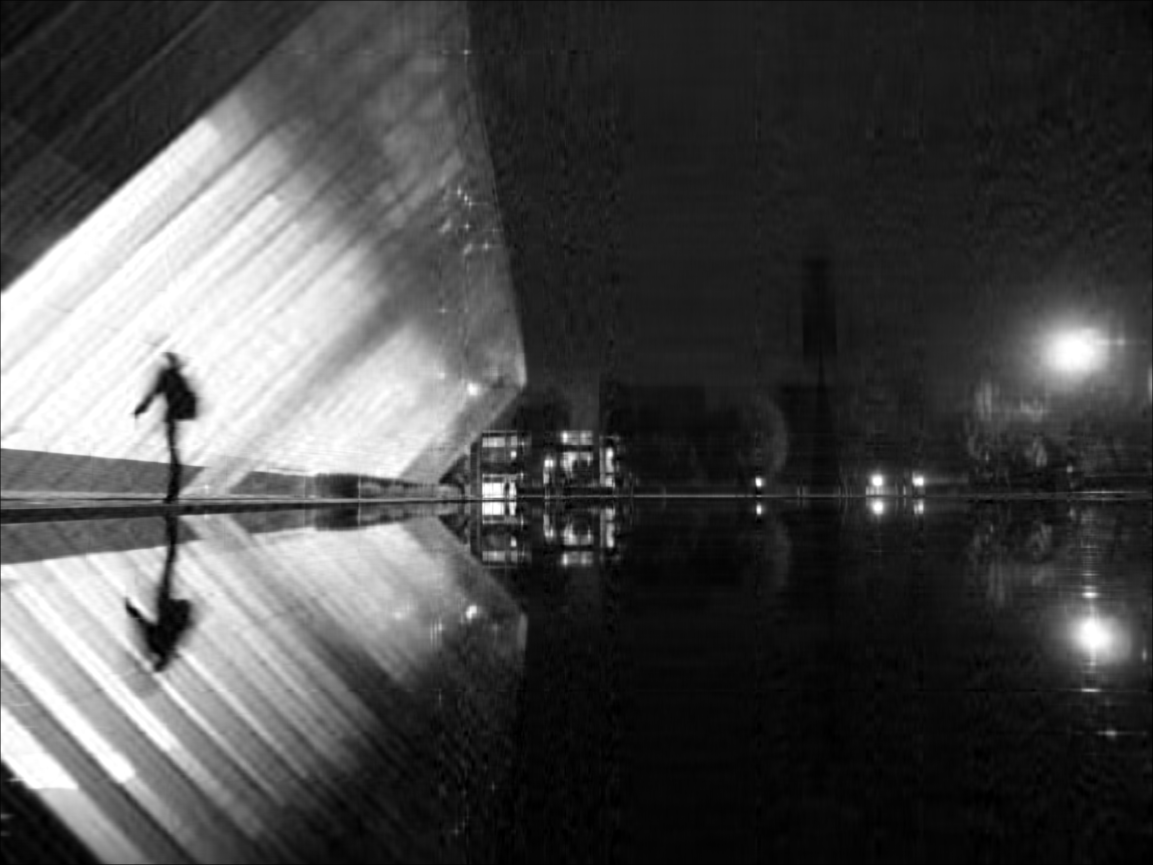

In [5]:
images_generated = compress_image(path, images_names, 50)
for file in images_generated
    img = FileIO.load(file)
    display(img)
end